(sec:LogisticRegression)=
# Logistic Regression

In linear regression our main interest was centered on learning the
coefficients of a functional fit (say a polynomial) in order to be
able to predict the response of a continuous variable on some unseen
data. The fit to the continuous variable $y^{(i)}$ is based on some
independent variables $\boldsymbol{x}^{(i)}$. Linear regression resulted in
analytical expressions for standard ordinary Least Squares or Ridge
regression (in terms of matrices to invert) for several quantities,
ranging from the variance and thereby the confidence intervals of the
parameters $\boldsymbol{w}$ to the mean squared error. If we can invert
the product of the design matrices, linear regression gives then a
simple recipe for fitting our data.


Classification problems, however, are concerned with outcomes taking
the form of discrete variables (i.e. categories). We may for example,
on the basis of DNA sequencing for a number of patients, like to find
out which mutations are important for a certain disease; or based on
scans of various patients' brains, figure out if there is a tumor or
not; or given a specific physical system, we'd like to identify its
state, say whether it is an ordered or disordered system (typical
situation in solid state physics); or classify the status of a
patient, whether she/he has a stroke or not and many other similar
situations.

The most common situation we encounter when we apply logistic
regression is that of two possible outcomes, normally denoted as a
binary outcome, true or false, positive or negative, success or
failure etc.

## Optimization and Deep learning

Logistic regression will also serve as our stepping stone towards
neural network algorithms and supervised deep learning. For logistic
learning, the minimization of the cost function leads to an 
optimization problem that is non-linear in the parameters $\boldsymbol{w}$. This optimization (how to find reliable minima of a multi-variable function) is a key challenge for all machine learning algorithms. This leads us back to the
family of gradient descent methods encountered in the chapter on {ref}`sec:MathematicalOptimization`. These methods are the working horses
of basically all modern machine learning algorithms.

We note also that many of the topics discussed here on logistic 
regression are also commonly used in modern supervised deep learning
models, as we will see later.

## Basics and notation

We consider the case where the dependent variables (also called the
responses, targets, or outcomes) are discrete and only take values
from $k=1, \dots, K$ (i.e. $K$ classes).

The goal is to predict the
output classes from the design matrix $\boldsymbol{X}\in\mathbb{R}^{n\times p}$
made of $n$ samples, each of which carries $p$ features or predictors. The
primary goal is to identify the classes to which new unseen samples
belong.

```{admonition} Notation
We will use the following notation:
* $\boldsymbol{x}$: independent (input) variables, typically a vector of length $p$. A matrix of $N$ instances of input vectors is denoted $\boldsymbol{X}$, and is also known as the *design matrix*. The input for machine-learning applications are often referred to as *features*.
* $t$: dependent, response variable, also known as the target. For binary classification the target $t^{(i)} \in \{0,1\}$. For $K$ different classes we would have $t^{(i)} \in \{1, 2, \ldots, K\}$. A vector of $N$ targets from $N$ instances of data is denoted $\boldsymbol{t}$.
* $\mathcal{D}$: is the data, where $\mathcal{D}^{(i)} = \{ (\boldsymbol{x}^{(i)}, t^{(i)} ) \}$.
* $\boldsymbol{y}$: is the output of our classifier that will be used to quantify probabilities $p_{t=C}$ that the target belongs to class $C$.
* $\boldsymbol{w}$: will be the parameters (weights) of our classification model.
```

## Binary classification

Let us specialize to the case of two classes only, with outputs
$t^{(i)} \in \{0,1\}$. That is


\begin{equation}

t^{(i)} = \begin{bmatrix} 0 \\  1 \end{bmatrix}
= \begin{bmatrix} \mathrm{no}\\  \mathrm{yes} \end{bmatrix}.

\end{equation}


### The perceptron

Before moving to the logistic model, let us try to use a linear regression model to classify these two outcomes. We could use a linear model 

\begin{equation}
\boldsymbol{\tilde{y}} = \boldsymbol{X} \boldsymbol{w},
\end{equation}

where $\boldsymbol{\tilde{y}}$ is a vector representing the possible outcomes, $\boldsymbol{X}$ is our $n\times p$ design matrix and $\boldsymbol{w}$ are the model parameters.

Note however that our outputs $\tilde{y}^{(i)} \in \mathbb{R}$ take values on the
entire real axis. Our targets $t^{(i)}$, however, are discrete variables. 

One simple way to get a discrete output is to have sign
functions that map the output of a linear regressor to values $y^{(i)} \in \{ 0, 1 \}$,
$y^{(i)} = f(\tilde{y}^{(i)})=\frac{\mathrm{sign}(\tilde{y}^{(i)})+1}{2}$, which will map to one if $\tilde{y}^{(i)}\ge 0$ and zero otherwise. 
Historically this model is called the *perceptron*  in the machine learning
literature. 

The perceptron is an example of a "hard classification" model. We
will encounter this model when we discuss neural networks as
well. Each datapoint is deterministically assigned to a category (i.e
$y^{(i)}=0$ or $y^{(i)}=1$). In many cases, it is favorable to have a *soft*
classifier that outputs the probability of a given category rather
than a single value. For example, given $\boldsymbol{x}^{(i)}$, the classifier
outputs the probability of being in a category $k$. 

### The logistic function

Logistic regression is the simplest example of the use of such a soft classifier. Let us assume that we have two classes such that $t^{(i)}$ is either $0$ or $1$. 

In logistic regression, we will use the so-called *logit* function

\begin{equation}
y(\boldsymbol{x}; \boldsymbol{w}) = y(z) = \frac{1}{1+e^{-z}} = \frac{e^z}{1+e^z},
\end{equation}

with the so called *activation* $z = z(\boldsymbol{x}; \boldsymbol{w})$. 
This function is no longer linear in the model parameters $\boldsymbol{w}$. It is an example of a S-shape or *Sigmoid* function. 

We let $y^{(i)}$ give the probability that a data point $\boldsymbol{x}^{(i)}$ belongs to category $t^{(i)} = 1$, 

\begin{equation}
\prob \left( t^{(i)} = 1 \vert \boldsymbol{x}^{(i)}, \boldsymbol{w} \right) = y(\boldsymbol{x}^{(i)}; \boldsymbol{w}).
\end{equation}


* Most frequently one uses $z = z(\boldsymbol{x}, \boldsymbol{w}) \equiv \boldsymbol{x} \cdot \boldsymbol{w}$.
* It is common to introduce also a bias, or threshold, weight $w_0$. This can be accommodated by prepending a constant feature $x_0^{(i)}=1$ for all $i$.
* Note that $1-y(z)= y(-z)$.
* The sigmoid function can be motivated in several different ways:
  * In information theory this function represents the probability of a signal $s=1$ rather than $s=0$ when transmission occurs over a noisy channel.
  * It can be seen as an artificial neuron that mimics aspects of its biological counterpart.
  
### Standard activation functions

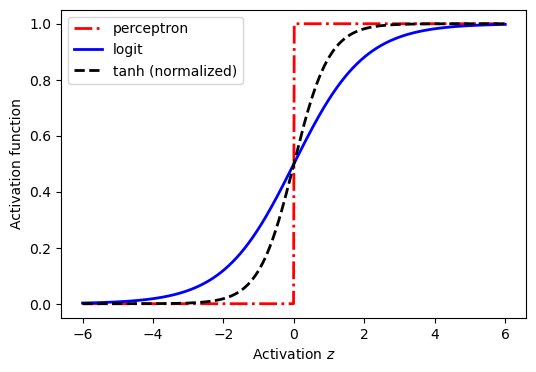

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue

# Set the relevant activation interval 
z = np.linspace(-6,6,num=1201)

# Perceptron model
def y_perceptron(z):
    return (np.sign(z)+1)/2
    
# logit model
def y_logit(z):
    return 1 / (1+np.exp(-z))
    
# tanh model
def y_tanh(x):
    return (np.tanh(z)+1)/2
    
    
# Create a visualization
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, **{"figsize":(6,4)})
ax.plot(z,y_perceptron(z),label='perceptron',lw=2,ls='-.',color='red')
ax.plot(z,y_logit(z),label='logit',lw=2,ls='-',color='blue')
ax.plot(z,y_tanh(z),label='tanh (normalized)',lw=2,ls='--',color='black')
ax.legend(loc='best')
ax.set_xlabel(r'Activation $z$')
ax.set_ylabel('Activation function')

glue("sigmoid_functions_fig", fig, display=False)

```{glue:figure} sigmoid_functions_fig
:name: "fig-sigmoid-functions"

The sigmoid, step,and (normalized) tanh functions; three common classifier functions used in classification and neural networks. In these lecture notes we use the letter $z$ to denote the activation.
```

### A binary classifier with two parameters

We assume now that we have two classes with $t^{(i)}$ being either $0$ or $1$. Furthermore we assume also that we have only two parameters $w_0, w_1$ and the features $\boldsymbol{x}^{(i)} = \{ 1, x^{(i)} \}$ defining the activation function. I.e., there is a single independent (input) variable $x$. We can produce probabilities from the classifier output $y^{(i)}$
\begin{align*}
\prob (t^{(i)}=1|x^{(i)},\boldsymbol{w}) &= y(z^{(i)})= \frac{\exp{(w_0+w_1x^{(i)})}}{1+\exp{(w_0+w_1x^{(i)})}},\\
\prob (t^{(i)}=0|x^{(i)},\boldsymbol{w}) &= 1 - \prob (t^{(i)}=1|x^{(i)},\boldsymbol{w}) = \frac{1}{1+\exp{(w_0+w_1x^{(i)})}},
\end{align*}
where $\boldsymbol{w} = ( w_0, w_1)$ are the weights we wish to extract from training data. 

### Determination of weights
Among ML practitioners, the prevalent approach to determine the weights in the activation function(s) is by minimizing some kind of cost function using some version of gradient descent. As we will see this usually corresponds to maximizing a likelihood function with or without a regularizer.

In this course we will obviously also advocate (or at least make aware of) the more probabilistic approach to learning about these parameters.
<!-- !split  -->
#### Maximum likelihood

In order to define the total likelihood for all possible outcomes from a dataset $\mathcal{D}=\{(x^{(i)}, t^{(i)},)\}$, with the binary labels
$t^{(i)}\in\{0,1\}$ and where the data points are drawn independently, we use the binary version of the [Maximum Likelihood Estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) (MLE) principle. 
We express the 
likelihood in terms of the product of the individual probabilities of a specific outcome $t^{(i)}$, that is 
\begin{align*}
\mathcal{L} = \prob (\mathcal{D}|\boldsymbol{w})& = \prod_{i=1}^N \left[p(t^{(i)}=1|x^{(i)},\boldsymbol{w})\right]^{t^{(i)}}\left[1-p(t^{(i)}=1|x^{(i)},\boldsymbol{w}))\right]^{1-t^{(i)}}\nonumber \\
\end{align*}

The **cost/loss** function (to be minimized) is then defined as the negative log-likelihood

\begin{equation}

\mathcal{C}(\boldsymbol{w}) = -L \equiv -\log(\mathcal{L}) = -\sum_{i=1}^N \left( t^{(i)}\log{\prob (t^{(i)}=1|x^{(i)},\boldsymbol{w})} + (1-t^{(i)})\log\left[1-\prob (t^{(i)}=1|x^{(i)},\boldsymbol{w}))\right]\right).

\end{equation}

#### The cost function rewritten as cross entropy

Using the definitions of the probabilities we can rewrite the **cost/loss** function as

\begin{equation}

\mathcal{C}(\boldsymbol{w}) = -\sum_{i=1}^N \left( t^{(i)}\log{ y(x^{(i)},\boldsymbol{w})} + (1-t^{(i)})\log\left[ 1-y( x^{(i)},\boldsymbol{w}) \right] \right),

\end{equation}

which can be recognised as the relative entropy between the empirical probability distribution $(t^{(i)}, 1-t^{(i)})$ and the probability distribution predicted by the classifier $(y^{(i)}, 1-y^{(i)})$.
Therefore, this cost function is known in statistics as the **cross entropy**. 

Using specifically the logistic sigmoid activation function with two weights, and reordering the logarithms, we can rewrite the log-likelihood to obtain


\begin{equation}
\mathcal{C}(\boldsymbol{w})=-\sum_{i=1}^N  \left[ t^{(i)} (w_0+w_1x^{(i)}) -\log{ \left( 1+\exp{(w_0+w_1x^{(i)})} \right) } \right].
\end{equation}

MLE should give the weights $\boldsymbol{w}^*$ that minimizes this cost function.

#### Regularization

In practice, just as for linear regression, one often supplements the cross-entropy cost function with additional regularization terms, usually $L_1$ and $L_2$ regularization. This introduces hyperparameters into the classifier.

In particular, Ridge regularization is obtained by defining another cost function

\begin{equation}

\mathcal{C}_W (\boldsymbol{w}) \equiv \mathcal{C} (\boldsymbol{w}) + \alpha E_W (\boldsymbol{w})

\end{equation}

where $E_W (\boldsymbol{w}) = \frac{1}{2} \sum_j w_j^2$ and $\alpha$ is known as the *weight decay*.

```{admonition} Question
:class: tip
Can you motivate why $\alpha$ is known as the weight decay?

*Hint*: Recall the origin of this regularizer from a Bayesian perspective.
```

<!-- !split -->
#### Minimizing the cross entropy

The cross entropy is a convex function of the weights $\boldsymbol{w}$ and,
therefore, any local minimizer is a global minimizer. 


Minimizing this cost function (here without regularization term) with respect to the two parameters $w_0$ and $w_1$ we obtain

\begin{align*}
\frac{\partial \mathcal{C}(\boldsymbol{w})}{\partial w_0} 
&= -\sum_{i=1}^N  \left(t^{(i)} -\frac{\exp{(w_0+w_1x^{(i)})}}{1+\exp{(w_0+w_1x^{(i)})}}\right)
&= -\sum_{i=1}^N  \left(t^{(i)} - y^{(i)} \right), \\
\frac{\partial \mathcal{C}(\boldsymbol{w})}{\partial w_1} 
&= -\sum_{i=1}^N  \left(t^{(i)} x^{(i)} -x^{(i)}\frac{\exp{(w_0+w_1x^{(i)})}}{1+\exp{(w_0+w_1x^{(i)})}}\right)
&= -\sum_{i=1}^N  x^{(i)} \left(t^{(i)} - y^{(i)} \right).
\end{align*}

#### A more compact expression

Let us now define a vector $\boldsymbol{t}$ with $n$ elements $t^{(i)}$, an
$N\times 2$ matrix $\boldsymbol{X}$ which contains the $(1, x^{(i)})$ predictor variables, and a
vector $\boldsymbol{y}$ of the outputs $y^{(i)} = y(x^{(i)},\boldsymbol{w})$. We can then express the first
derivative of the cost function in matrix form

\begin{equation}

\frac{\partial \mathcal{C}(\boldsymbol{w})}{\partial \boldsymbol{w}} = -\boldsymbol{X}^T\left( \boldsymbol{t}-\boldsymbol{y} \right). 

\end{equation}

<!-- !split -->
### A learning algorithm

*Notice.* 
Having access to the first derivative we can define an *on-line learning rule* as follows:
* For each input $i$ (possibly permuting the sequence in each epoch) compute the error $e^{(i)} = t^{(i)} - y^{(i)}$.
* Adjust the weights in a direction that would reduce this error: $\Delta w_j = \eta e^{(i)} x_j^{(i)}$. The parameter $\eta$ is called the *learning rate*.
* Perform multiple passes through the data, where each pass is known as an *epoch*. The computation of outputs $\boldsymbol{y}$ given a set of weights $\boldsymbol{w}$ is known as a *forward pass*, while the computation of gradients and adjustment of weights is called *back-propagation*.

You will recognise this learning algorithm as *stochastic gradient descent*.

Alternatively, one can perform *batch learning* for which multiple instances are combined into a batch, and the weights are adjusted following the matrix expression stated above. At the end, one hopes to have reached an optimal set of weights.

#### Extending to more features

Within a binary classification problem, we can easily expand our model to include multiple input features. Our activation function is then (with $p$ features)

\begin{equation}

z( \boldsymbol{x}^{(i)}, \boldsymbol{w} ) = w_0 + w_1 x_1^{(i)} + w_2 x_2^{(i)} + \dots + w_p x_p^{(i)}.

\end{equation}

Defining $\boldsymbol{x}^{(i)} \equiv [1,x_1^{(i)}, x_2^{(i)}, \dots, x_p^{(i)}]$ and $\boldsymbol{w}=[w_0, w_1, \dots, w_p]$ we get

\begin{equation}

\prob (t^{(i)}=1 | \boldsymbol{w}, \boldsymbol{x}^{(i)}) = \frac{ \exp{ \left( \boldsymbol{w} \cdot \boldsymbol{x}^{(i)} \right) }}{ 1 + \exp{ \left( \boldsymbol{w} \cdot \boldsymbol{x}^{(i)} \right) } }.

\end{equation}

## Extending to more classes

Until now we have focused on binary classification involving just a decision between two classes. Suppose we wish to extend to $K$ classes.  We will then introduce $K$ outputs $\boldsymbol{y}^{(i)} = \{ y_1^{(i)}, y_2^{(i)}, \ldots, y_{K}^{(i)} \}$. 

```{admonition} Question
Actually, we would only need $K-1$ outputs to create a soft classifier for $K$ classes. Why?
```

Let us for the sake of simplicity assume we have only one feature. The activations are (suppressing the index $i$)

\begin{equation}

z_1 = w_{1,0}+w_{1,1}x_1,

\end{equation}

\begin{equation}

z_2 = w_{2,0}+w_{2,1}x_1,

\end{equation}

and so on until the class $K$:th class

\begin{equation}

z_{K} = w_{K,0}+w_{K,1}x_1,

\end{equation}

and the model is specified in term of $K$ so-called log-odds or **logit** transformations $y_j^{(i)} = y(z_j^{(i)})$.


### Class probabilities: The Softmax function

The transformation of the multiple outputs, as described above, to probabilities for belonging to any of $K$ different classes can be achieved via the so-called *Softmax* function.

The Softmax function is used in various multiclass classification
methods, such as multinomial logistic regression (also known as
softmax regression), multiclass linear discriminant analysis, naive
Bayes classifiers, and artificial neural networks.  Specifically, the predicted probability for the $k$:th class given a sample
vector $\boldsymbol{x}^{(i)}$ and a weighting vector $\boldsymbol{w}$ is (with one independent variable):

\begin{equation}
\prob (t^{(i)}=k\vert \boldsymbol{x}^{(i)},  \boldsymbol{w} ) = \frac{\exp{(w_{k,0}+w_{k,1}x_1^{(i)})}} {\sum_{l=1}^{K}\exp{(w_{l,0}+w_{l,1}x_1^{(i)})}}.
\end{equation}

which means that the discrete set of probabilities is properly normalized. 

Our earlier discussions were all specialized to
the case with two classes only. It is easy to see from the above that
what we derived earlier is compatible with these equations.